In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
img_folder = 'F:/Kaggle_datasets/Cards/train/ace of clubs/'
imgs = os.listdir(img_folder)

#batch of images from folder
batch_x = [Image.open(img_folder+p).resize((224,224)) for p in imgs[10:20]]

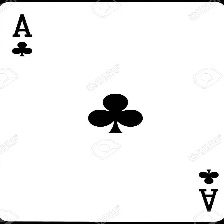

In [3]:
batch_x[2]

In [4]:
def normalize_image(x):
    x = x/np.max(x)
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    return (x - mean) / std

def denormalize_image(x):
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229,0.224,0.225])
    x = std * x + mean
    x = np.clip(x, 0, 1)
    return x

In [5]:
lamda = 0.75
batch_size = len(batch_x)
current_image = normalize_image(np.array(batch_x[0]))
random_index = randint(0, batch_size - 1)
random_image_from_batch = normalize_image(np.array(batch_x[random_index]))

(-0.5, 223.5, 223.5, -0.5)

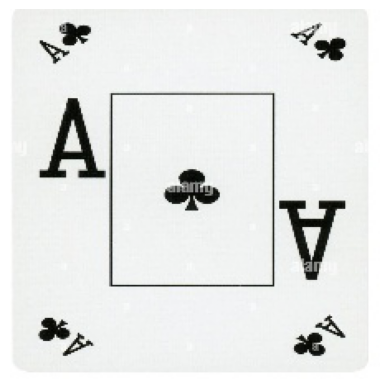

In [6]:
plt.imshow(denormalize_image(current_image))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

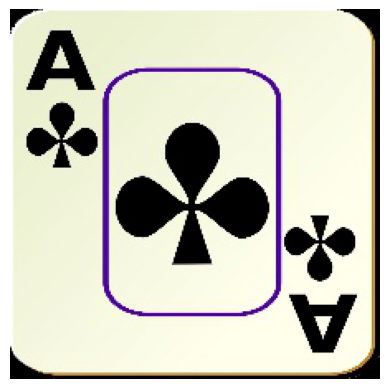

In [7]:
plt.imshow(denormalize_image(random_image_from_batch))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

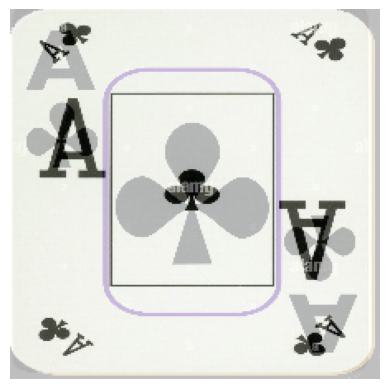

In [8]:
mixed_image = lamda * current_image + (1 - lamda) * random_image_from_batch

plt.imshow(denormalize_image(mixed_image))
plt.axis("off")

Using in Neural Networks:

Loss = lamda * cross_entropy_loss(pred , current_image) 
       + (1-lamda) * cross_entropy_loss(pred , random_image_from_batch)